# Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import numpy as np
from scipy.odr import Model, Data, ODR
from scipy.stats import linregress
import numpy as np
import matplotlib.cm as cm
from scipy import constants
import pandas as pd
from matplotlib import rc
import matplotlib
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
from matplotlib import rcParams
rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams.update({'font.size': 22})
plt.ioff()
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print "Current size:", fig_size

# Set figure width to 9 and height to 9
fig_size[1] = 9
fig_size[0] = 9
markersize = 10
plt.rcParams["figure.figsize"] = fig_size

Current size: [9.0, 9.0]


# Define Gaussian model + Airy

In [7]:
def one_D_Gaussian(amplitude,xrang1,xrang2,wavelength,diameter,correction_factor):
    x = np.linspace(xrang1,xrang2,5000,endpoint=True)
    y =x 
    if xrang1 == xrang2:
        x = xrang1
    HPBW = ((correction_factor*wavelength)/diameter)*(180/np.pi)*60 ### Code used arcmin as the offset parameter
    sigma = np.sqrt((HPBW*HPBW)/(8*np.log(2)))
    # = amplitude*np.e**((-1*x*x)/(2*(sigma*sigma)))
    mod = models.Gaussian2D(amplitude=amplitude,x_stddev=sigma,y_stddev=sigma)(x,y)
    return mod

def one_D_Airy(amplitude,xrang1,xrang2,x_max,y_max,radius):
    x = np.linspace(xrang1,xrang2,5000,endpoint=True)
    y =x 
    if xrang1 == xrang2:
        x = xrang1
    #HPBW = ((correction_factor*wavelength)/diameter)*(180/np.pi)*60 ### Code used arcmin as the offset parameter
    #sigma = np.sqrt((HPBW*HPBW)/(8*np.log(2)))
    # = amplitude*np.e**((-1*x*x)/(2*(sigma*sigma)))
    mod = models.AiryDisk2D(amplitude=amplitude,x_0=x_max,y_0=y_max,radius=radius)(x,y)
    return x,mod

# Scale + Fit

In [8]:
scale = 3.325201
x,mod = one_D_Airy(1,-1*scale,1*scale,0,0,1.22*scale)

g_init = models.Gaussian1D(amplitude=1., mean=0, stddev=1.)
g_init.amplitude.fixed = True
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, mod)

## Plot 

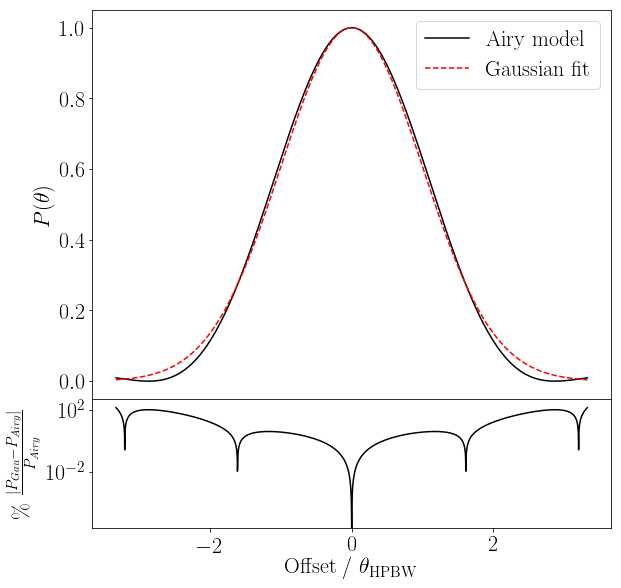

Parameter('stddev', value=1.00000175231)


In [11]:
fig1 = plt.figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.5,.8,.6))
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.plot(x,mod,'k-',label='Airy model') #Noisy data
plt.plot(x, g(x),'r--', label='Gaussian fit') #Best fit model
plt.ylabel(r'$P(\theta$)')
plt.legend()
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame

#Residual plot
difference = np.abs((g(x) - mod))/g(x)
frame2=fig1.add_axes((.1,.3,.8,.2))        
plt.plot(x,difference*100,'k-')
plt.yscale('log')
plt.xlabel(r'Offset / $\theta_{\mathrm{HPBW}}$')
plt.ylabel(r'\% $\frac{|P_{Gau}-P_{Airy}|}{P_{Airy}}$')
plt.ylim(0,500)
plt.savefig('error_residuals_Airy_Gaussian.pdf',bbox_inches='tight')
plt.show()

print g.stddev

# Save % error residuals

In [12]:
np.save('error_residuals_Airy_Gaussian.npy',np.array([x,difference]))